In [1]:
import pandas as pd

# Creating a mixed dataset of strings, floats, and date strings
df = pd.DataFrame(
    [
        ["cat", 1.0, "3-2021"],
        ["cat", 0.5, "1-2021"],
        ["dog", 0.2, "5-2021"],
        ["bird", 3.3, "3-2021"],
        ["dog", 5.7, "1-2021"],
        ["dog", 0.0, "2-2021"],
        ["cat", 1.9, "4-2021"],
        ["bird", 2.4, "4-2021"],
        ["bird", 2.4, "5-2021"]
    ],
    columns=["animal", "value", "date"]
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   animal  9 non-null      object 
 1   value   9 non-null      float64
 2   date    9 non-null      object 
dtypes: float64(1), object(2)
memory usage: 344.0+ bytes


In [2]:
df['animal'] = df['animal'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   animal  9 non-null      category
 1   value   9 non-null      float64 
 2   date    9 non-null      object  
dtypes: category(1), float64(1), object(1)
memory usage: 413.0+ bytes


<AxesSubplot:>

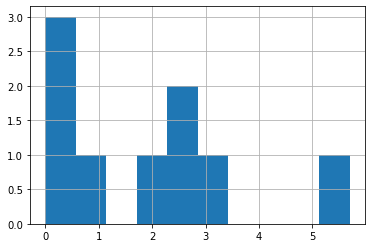

In [3]:
#Normalizing Data

df["value"].hist()


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["value"]])
scaler.transform(df[["value"]])

array([[-0.54744332],
       [-0.84071653],
       [-1.01668045],
       [ 0.80161343],
       [ 2.20932483],
       [-1.13398974],
       [-0.01955155],
       [ 0.27372166],
       [ 0.27372166]])

<AxesSubplot:>

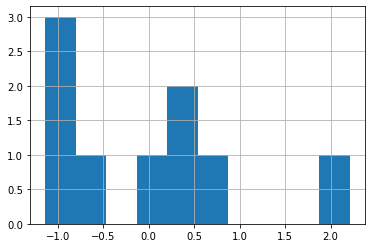

In [5]:
df["value_transformed"] = scaler.transform(df[["value"]])
df["value_transformed"].hist()

In [6]:
# Parsing Data Types

df["year"] = pd.to_datetime(df["date"]).dt.year
df["month"] = pd.to_datetime(df["date"]).dt.month

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   animal             9 non-null      category
 1   value              9 non-null      float64 
 2   date               9 non-null      object  
 3   value_transformed  9 non-null      float64 
 4   year               9 non-null      int64   
 5   month              9 non-null      int64   
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 629.0+ bytes


In [7]:
df

,animal,value,date,value_transformed,year,month
0,cat,1.0,3-2021,-0.547443,2021,3
1,cat,0.5,1-2021,-0.840717,2021,1
2,dog,0.2,5-2021,-1.016680,2021,5
3,bird,3.3,3-2021,0.801613,2021,3
4,dog,5.7,1-2021,2.209325,2021,1
5,dog,0.0,2-2021,-1.133990,2021,2
6,cat,1.9,4-2021,-0.019552,2021,4
7,bird,2.4,4-2021,0.273722,2021,4
8,bird,2.4,5-2021,0.273722,2021,5


In [8]:
#One-hot Encoding

pd.get_dummies(df["animal"], prefix="animal")


,animal_bird,animal_cat,animal_dog
0,0,1,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,0,1,0
7,1,0,0
8,1,0,0


In [9]:
df

,animal,value,date,value_transformed,year,month
0,cat,1.0,3-2021,-0.547443,2021,3
1,cat,0.5,1-2021,-0.840717,2021,1
2,dog,0.2,5-2021,-1.016680,2021,5
3,bird,3.3,3-2021,0.801613,2021,3
4,dog,5.7,1-2021,2.209325,2021,1
5,dog,0.0,2-2021,-1.133990,2021,2
6,cat,1.9,4-2021,-0.019552,2021,4
7,bird,2.4,4-2021,0.273722,2021,4
8,bird,2.4,5-2021,0.273722,2021,5
